In [ ]:
!pip install pycaret

In [ ]:
from pycaret.datasets import get_data
dataset=get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
dataset=dataset.drop(['department','average_montly_hours'],axis=1)

In [ ]:
dataset

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,3,0,0,low,1
1,0.80,0.86,5,6,0,0,medium,1
2,0.11,0.88,7,4,0,0,medium,1
3,0.72,0.87,5,5,0,0,low,1
4,0.37,0.52,2,3,0,0,low,1
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,0,0,low,1
14995,0.37,0.48,2,3,0,0,low,1
14996,0.37,0.53,2,3,0,0,low,1
14997,0.11,0.96,6,4,0,0,low,1


In [ ]:
data_seen = dataset.sample(frac=0.95, random_state=780).reset_index(drop=True)
data_unseen = dataset.drop(data_seen.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (14249, 8)
Unseen Data For Predictions: (750, 8)


In [ ]:
data_seen

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.45,0.57,2,3,0,0,low,1
1,0.70,0.91,5,3,1,0,medium,0
2,0.09,0.96,6,4,0,0,low,1
3,0.93,0.95,6,3,0,0,low,0
4,0.59,0.97,3,3,0,0,low,0
...,...,...,...,...,...,...,...,...
14244,0.82,0.78,5,2,1,0,low,0
14245,0.88,1.00,5,5,0,0,low,1
14246,0.31,0.92,4,6,0,0,medium,0
14247,0.88,0.61,3,3,0,0,medium,0


In [ ]:
data_unseen

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.11,0.89,6,4,0,0,low,1
1,0.41,0.54,2,3,0,0,low,1
2,0.87,0.88,5,5,0,0,low,1
3,0.45,0.48,2,3,0,0,low,1
4,0.40,0.46,2,3,0,0,low,1
...,...,...,...,...,...,...,...,...
745,0.40,0.57,2,3,0,0,low,1
746,0.37,0.48,2,3,0,0,low,1
747,0.37,0.53,2,3,0,0,low,1
748,0.11,0.96,6,4,0,0,low,1


In [ ]:
from pycaret.classification import *


In [ ]:
clf=setup(data=data_seen,target='left',session_id=123,ignore_low_variance=True,normalize=True,transformation=True)

,Description,Value
0,session_id,123
1,Target,left
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14249, 8)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9839,0.9886,0.9575,0.9745,0.9658,0.9552,0.9554,0.805
et,Extra Trees Classifier,0.9790,0.9852,0.9537,0.9583,0.9559,0.9421,0.9422,0.764
xgboost,Extreme Gradient Boosting,0.9786,0.9904,0.9385,0.9710,0.9543,0.9404,0.9407,1.099
lightgbm,Light Gradient Boosting Machine,0.9777,0.9914,0.9339,0.9717,0.9523,0.9378,0.9382,0.137
catboost,CatBoost Classifier,0.9767,0.9903,0.9314,0.9700,0.9501,0.9350,0.9354,4.248
gbc,Gradient Boosting Classifier,0.9720,0.9857,0.9213,0.9598,0.9401,0.9218,0.9222,0.632
dt,Decision Tree Classifier,0.9715,0.9662,0.9541,0.9288,0.9411,0.9223,0.9226,0.037
knn,K Neighbors Classifier,0.9605,0.9762,0.9133,0.9204,0.9167,0.8908,0.8910,0.172
ada,Ada Boost Classifier,0.9518,0.9765,0.8868,0.9087,0.8974,0.8659,0.8662,0.291
lr,Logistic Regression,0.8943,0.9352,0.7925,0.7708,0.7812,0.7116,0.7119,0.385


In [ ]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9810,0.9901,0.9664,0.9544,0.9603,0.9478,0.9478
1,0.9830,0.9884,0.9622,0.9662,0.9642,0.9530,0.9530
2,0.9810,0.9876,0.9664,0.9544,0.9603,0.9478,0.9478
3,0.9880,0.9921,0.9748,0.9748,0.9748,0.9669,0.9669
4,0.9829,0.9900,0.9451,0.9825,0.9634,0.9523,0.9526
5,0.9840,0.9956,0.9451,0.9868,0.9655,0.9551,0.9554
6,0.9769,0.9772,0.9198,0.9820,0.9499,0.9349,0.9358
7,0.9870,0.9968,0.9705,0.9746,0.9725,0.9640,0.9640
8,0.9880,0.9851,0.9622,0.9871,0.9745,0.9666,0.9667
9,0.9870,0.9828,0.9622,0.9828,0.9724,0.9639,0.9640


In [ ]:
tune_rf=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9669,0.9713,0.9160,0.9437,0.9296,0.9080,0.9082
1,0.9760,0.9701,0.9286,0.9693,0.9485,0.9328,0.9332
2,0.9719,0.9818,0.9328,0.9487,0.9407,0.9223,0.9224
3,0.9669,0.9826,0.8992,0.9596,0.9284,0.9069,0.9078
4,0.9679,0.9800,0.9156,0.9476,0.9313,0.9104,0.9106
5,0.9769,0.9724,0.9114,0.9908,0.9495,0.9345,0.9359
6,0.9589,0.9624,0.8819,0.9414,0.9107,0.8840,0.8848
7,0.9759,0.9774,0.9241,0.9733,0.9481,0.9324,0.9329
8,0.9769,0.9809,0.9244,0.9778,0.9503,0.9353,0.9359
9,0.9789,0.9798,0.9370,0.9738,0.9550,0.9413,0.9416


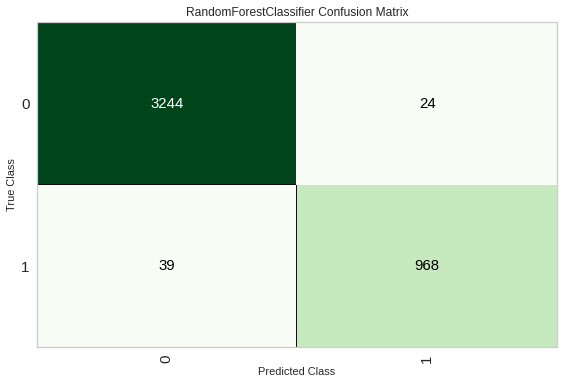

In [ ]:
plot_model(rf,plot='confusion_matrix')

In [ ]:
final_rf=finalize_model(rf)

In [ ]:
unseen_predictions=predict_model(final_rf,data=data_unseen)
unseen_predictions.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,salary,left,Label,Score
0,0.11,0.89,6,4,0,0,low,1,1,1.0000
1,0.41,0.54,2,3,0,0,low,1,1,1.0000
2,0.87,0.88,5,5,0,0,low,1,1,1.0000
3,0.45,0.48,2,3,0,0,low,1,1,1.0000
4,0.40,0.46,2,3,0,0,low,1,1,0.9442


In [ ]:
save_model(final_rf,'final rf model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='left',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [ ]:
data_unseen.to_csv('/content/employee_pred.csv')